<a href="https://colab.research.google.com/github/kimjeongsoo20190147/bank_transaction_fraud_detation/blob/main/bank_transaction_fraud_detaction_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_class_weight
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import LinearDiscriminantAnalysis as LDA, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
import xgboost as xgb
import lightgbm as lgb
#import catboost as cb
import warnings


In [3]:
# 코랩에 CSV 파일 넣고 데이터 보기
df=pd.read_csv("/content/Bank_Transaction_Fraud_Detection.csv")
df.head(5)

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

# 2. Data Preprocessing

In [5]:
# Checking for missing values
print("Missing NULL values in the dataset:")
print(df.isnull().sum())
print("-"*80)
print("Missing N/A values in the dataset:")
print(df.isna().sum())

Missing NULL values in the dataset:
Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64
--------------------------------------------------------------------------------
Missing N/A values in the dataset:
Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                  

In [6]:
desc = pd.DataFrame(index = list(df))
desc['type'] = df.dtypes
desc['count'] = df.count()
desc['nunique'] = df.nunique()
desc['%unique'] = desc['nunique'] /len(df) * 100
desc['null'] = df.isnull().sum()
desc['%null'] = desc['null'] / len(df) * 100
desc = pd.concat([desc,df.describe().T.drop('count',axis=1)],axis=1)
desc.sort_values(by=['type','null']).style.background_gradient(cmap='YlOrBr')\
    .bar(subset=['mean'],color='green')\
    .bar(subset=['max'],color='red')\
    .bar(subset=['min'], color='pink')

,type,count,nunique,%unique,null,%null,mean,std,min,25%,50%,75%,max
Age,int64,200000,53,0.026500,0,0.000000,44.015110,15.288774,18.000000,31.000000,44.000000,57.000000,70.000000
Is_Fraud,int64,200000,2,0.001000,0,0.000000,0.050440,0.218852,0.000000,0.000000,0.000000,0.000000,1.000000
Transaction_Amount,float64,200000,197978,98.989000,0,0.000000,49538.015554,28551.874004,10.290000,24851.345000,49502.440000,74314.625000,98999.980000
Account_Balance,float64,200000,197954,98.977000,0,0.000000,52437.988784,27399.507128,5000.820000,28742.395000,52372.555000,76147.670000,99999.950000
Customer_ID,object,200000,200000,100.000000,0,0.000000,nan,nan,nan,nan,nan,nan,nan
Customer_Name,object,200000,142699,71.349500,0,0.000000,nan,nan,nan,nan,nan,nan,nan
Gender,object,200000,2,0.001000,0,0.000000,nan,nan,nan,nan,nan,nan,nan
State,object,200000,34,0.017000,0,0.000000,nan,nan,nan,nan,nan,nan,nan
City,object,200000,145,0.072500,0,0.000000,nan,nan,nan,nan,nan,nan,nan
Bank_Branch,object,200000,145,0.072500,0,0.000000,nan,nan,nan,nan,nan,nan,nan


In [7]:
# Get a list of categorical columns in the dataframe
categorical_columns = df.select_dtypes(include=['object']).columns

# Check the unique values and their counts for each categorical column
for col in categorical_columns:
    print(f"Column: {col}")
    print("-" * 25)
    print(f"Unique values: {df[col].nunique()}")
    print(f"Unique values sample: {df[col].unique()[:10]}")  # Display a sample of unique values
    print("-" * 50)

Column: Customer_ID
-------------------------
Unique values: 200000
Unique values sample: ['d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e'
 '7c14ad51-781a-4db9-b7bd-67439c175262'
 '3a73a0e5-d4da-45aa-85f3-528413900a35'
 '7902f4ef-9050-4a79-857d-9c2ea3181940'
 '3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9'
 '6c870d65-76b0-431d-bdf3-9292998e8211'
 '5323737c-bbd2-423f-9c9b-e0433c8f75dc'
 'c0c3d474-f6c2-4c66-9b0e-f9ba75c6f310'
 'e9a82764-1253-4a46-ad34-80e3416fc801'
 '708224d5-192a-4d86-b411-8ec6d1bb274b']
--------------------------------------------------
Column: Customer_Name
-------------------------
Unique values: 142699
Unique values sample: ['Osha Tella' 'Hredhaan Khosla' 'Ekani Nazareth' 'Yamini Ramachandran'
 'Kritika Rege' 'Ishanvi Dar' 'Arya Shroff' 'Jackson Shere'
 'Bhanumati Ravel' 'Meera Ganesh']
--------------------------------------------------
Column: Gender
-------------------------
Unique values: 2
Unique values sample: ['Male' 'Female']
--------------------------------------------------


In [8]:
# If a column has only one unique value, it won't be useful for prediction.
single_value_columns = [col for col in df.columns if df[col].nunique() == 1]
print("Columns with only one unique value:", single_value_columns)

# Dropping columns with one unique value
df = df.drop(columns=single_value_columns)

Columns with only one unique value: ['Transaction_Currency']


In [9]:
# Checking columns after dropping one unique columns
df.columns

Index(['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Merchant_ID',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Customer_Contact', 'Transaction_Description', 'Customer_Email'],
      dtype='object')

In [10]:
# Drop the columns which are not useful for the model evaluation
df = df.drop(columns=['Customer_Contact', 'Customer_Email', 'Customer_Name', 'Customer_ID', 'Transaction_ID', 'Merchant_ID'])
print(df.shape)

(200000, 17)


In [11]:
# Checking columns after dropping not useful columns
df.columns

Index(['Gender', 'Age', 'State', 'City', 'Bank_Branch', 'Account_Type',
       'Transaction_Date', 'Transaction_Time', 'Transaction_Amount',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Description'],
      dtype='object')

# 3. Exploratory Data Analysis(EDA)

In [12]:
# For numerical columns, we'll fill missing values with the median of each column
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())

print(numerical_columns)

Index(['Age', 'Transaction_Amount', 'Account_Balance', 'Is_Fraud'], dtype='object')


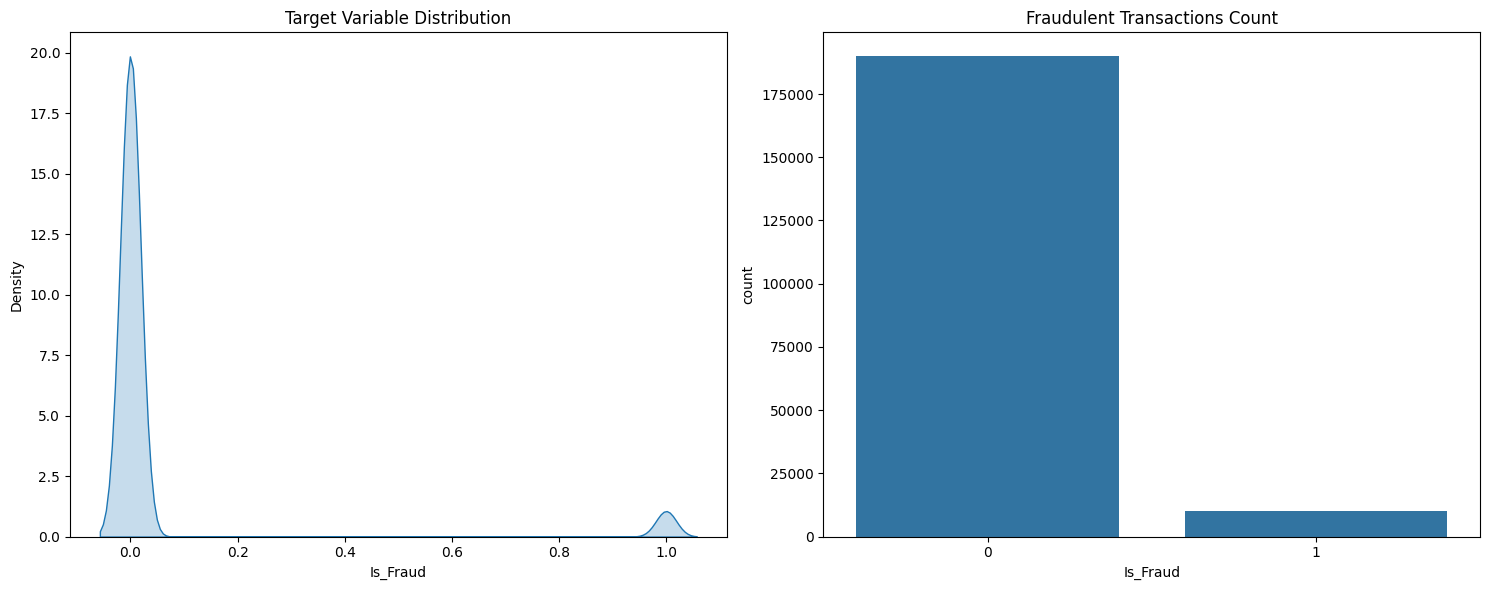

In [13]:
# Create a figure with 2 subplots in a horizontal row
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# KDE plot for the 'Is_Fraud' column (on the first subplot)
sns.kdeplot(df["Is_Fraud"], fill=True, ax=axes[0])
axes[0].set_title('Target Variable Distribution')

# Count plot for the 'Is_Fraud' column (on the second subplot)
sns.countplot(x='Is_Fraud', data=df, ax=axes[1])
axes[1].set_title('Fraudulent Transactions Count')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

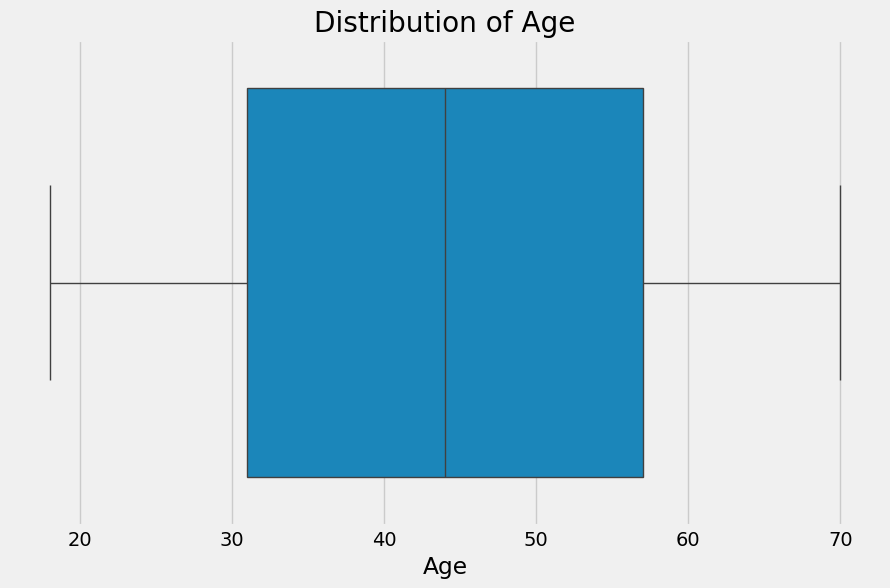

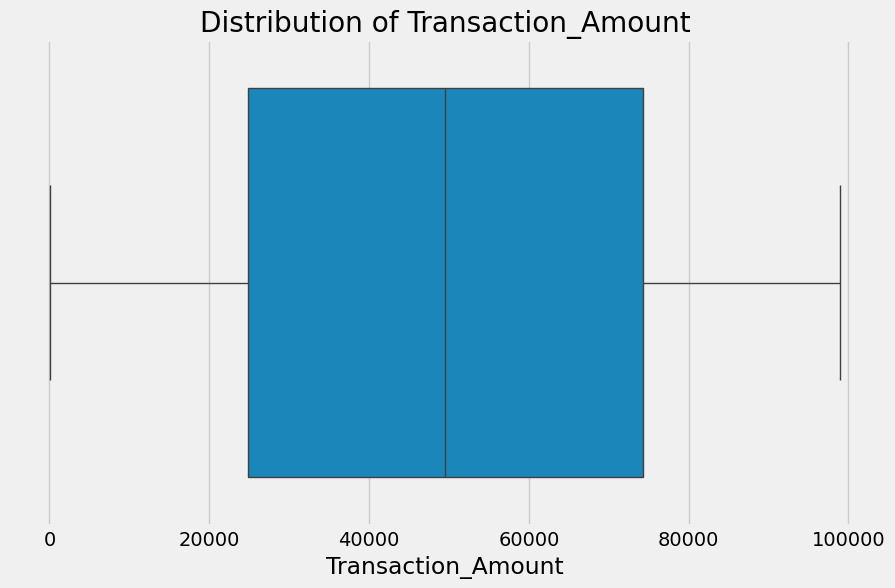

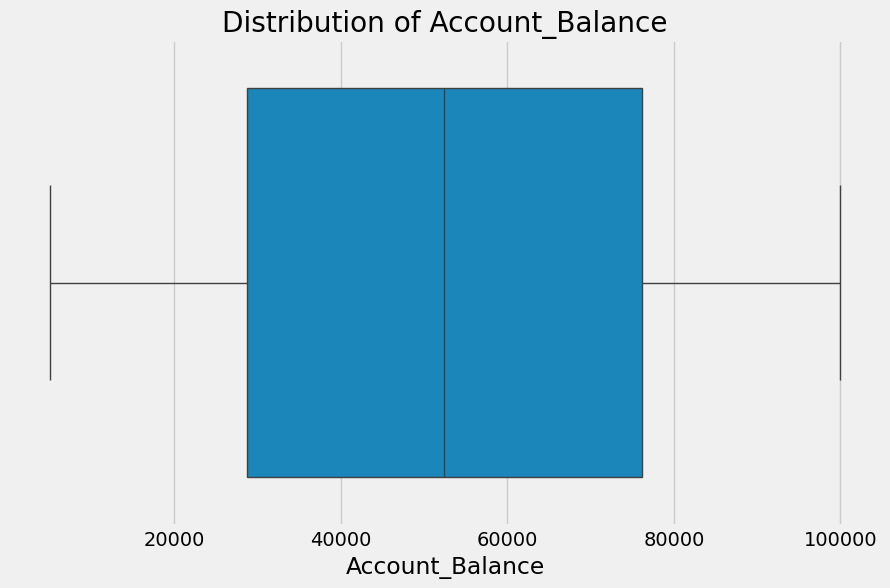

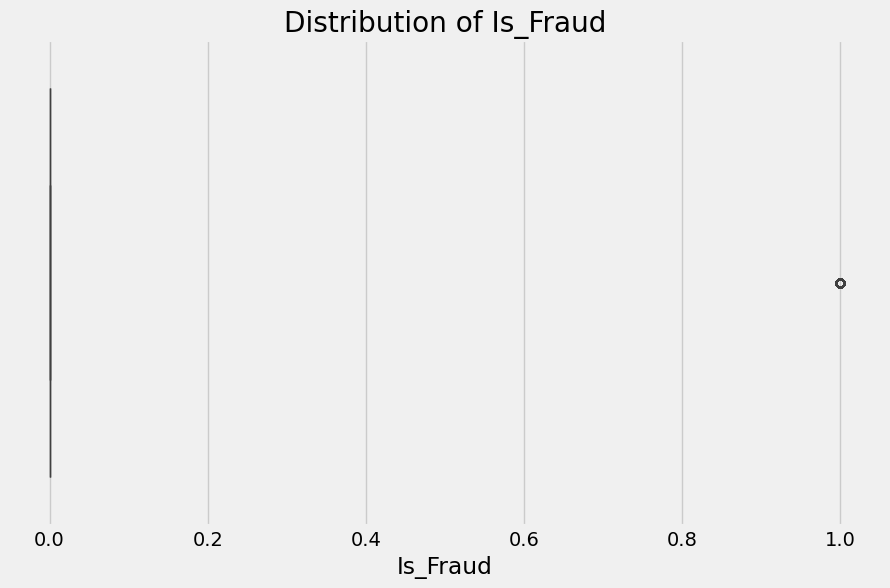

In [14]:
# Loop through each numerical column in your DataFrame
for col in numerical_columns:
    plt.style.use("fivethirtyeight")
    plt.figure(figsize=(10, 6))

    # Create the boxplot
    sns.boxplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

    # Show the plot
    plt.show()

In [15]:
# For categorical columns, we'll fill missing values with the mode (most frequent category)
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print(categorical_columns)

Index(['Gender', 'State', 'City', 'Bank_Branch', 'Account_Type',
       'Transaction_Date', 'Transaction_Time', 'Transaction_Type',
       'Merchant_Category', 'Transaction_Device', 'Transaction_Location',
       'Device_Type', 'Transaction_Description'],
      dtype='object')


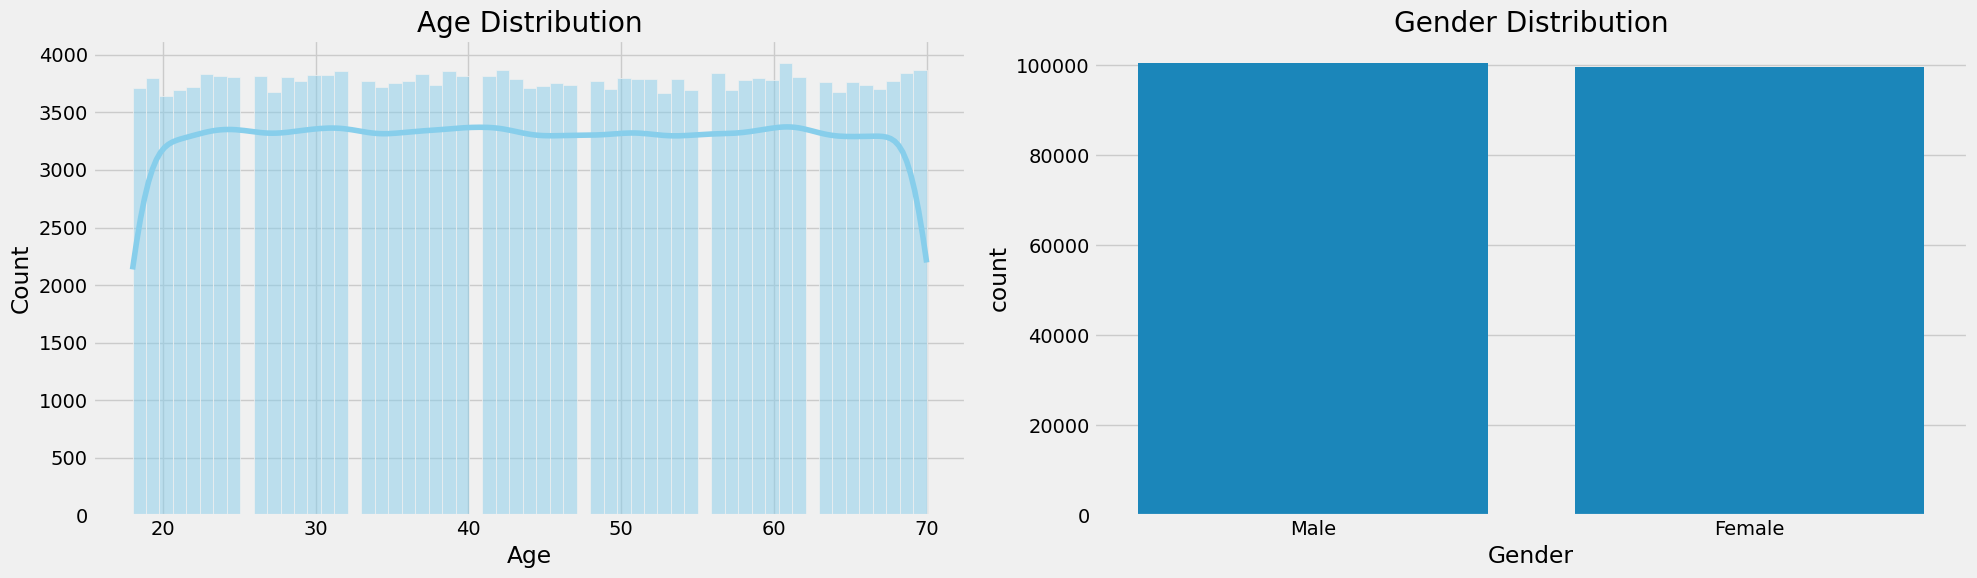

In [16]:
# Create a figure with 4 subplots in a horizontal row
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 4 columns

# Histogram for the 'Age' column (on the third subplot)
sns.histplot(df['Age'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution')

# Count plot for the 'Gender' column (on the fourth subplot)
sns.countplot(x='Gender', data=df, ax=axes[1])
axes[1].set_title('Gender Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

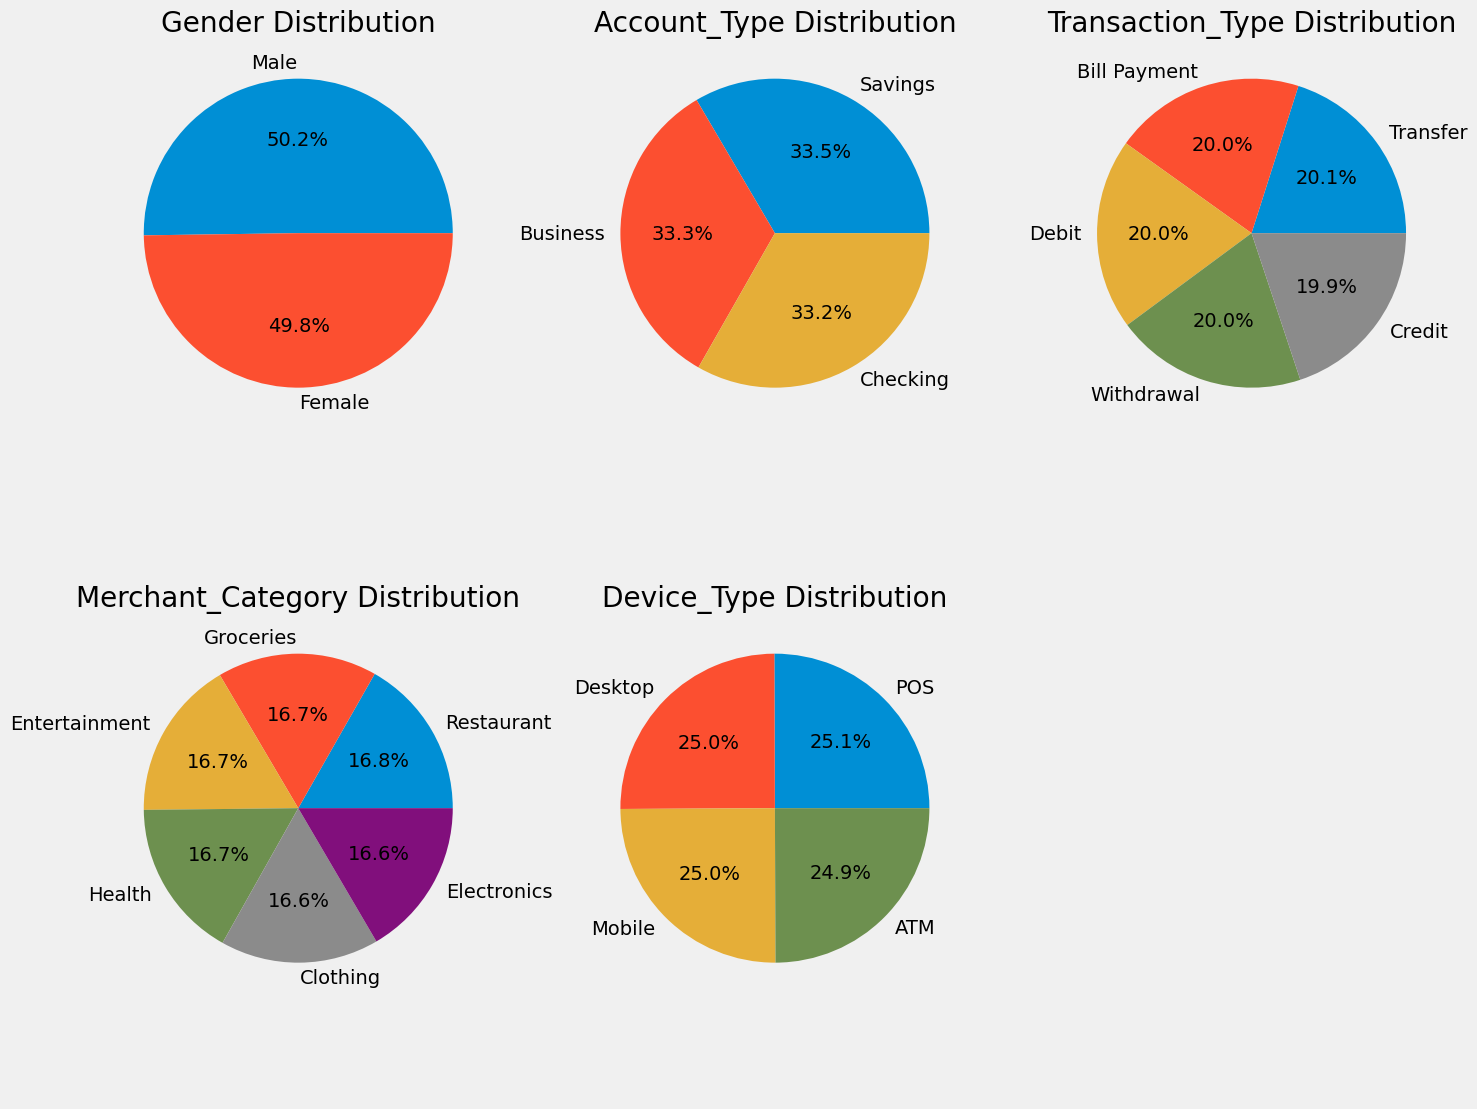

In [17]:
# Calculate the number of rows needed based on the number of charts
num_cols = 3  # Number of charts per row
# num_rows = (len(categorical_columns) + num_cols - 1) // num_cols  # Calculate rows required for all charts
num_rows = 2 # Number of rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 6))  # Adjust figure size for more rows

# Flatten the axes array for easier iteration
axes = axes.flatten()

ax_index = 0
for col in categorical_columns:
    unique_values = df[col].nunique()
    if unique_values < 10:  # Only plot if unique values are less than 10
        # Plot on the respective subplot
        ax = axes[ax_index]
        ax.pie(df[col].value_counts(), labels=df[col].unique(), autopct='%1.1f%%')
        ax.set_title(f'{col} Distribution')

        # Move to the next subplot
        ax_index += 1

# Hide any unused subplots (in case there are fewer than `num_rows * num_cols` charts)
for i in range(ax_index, len(axes)):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

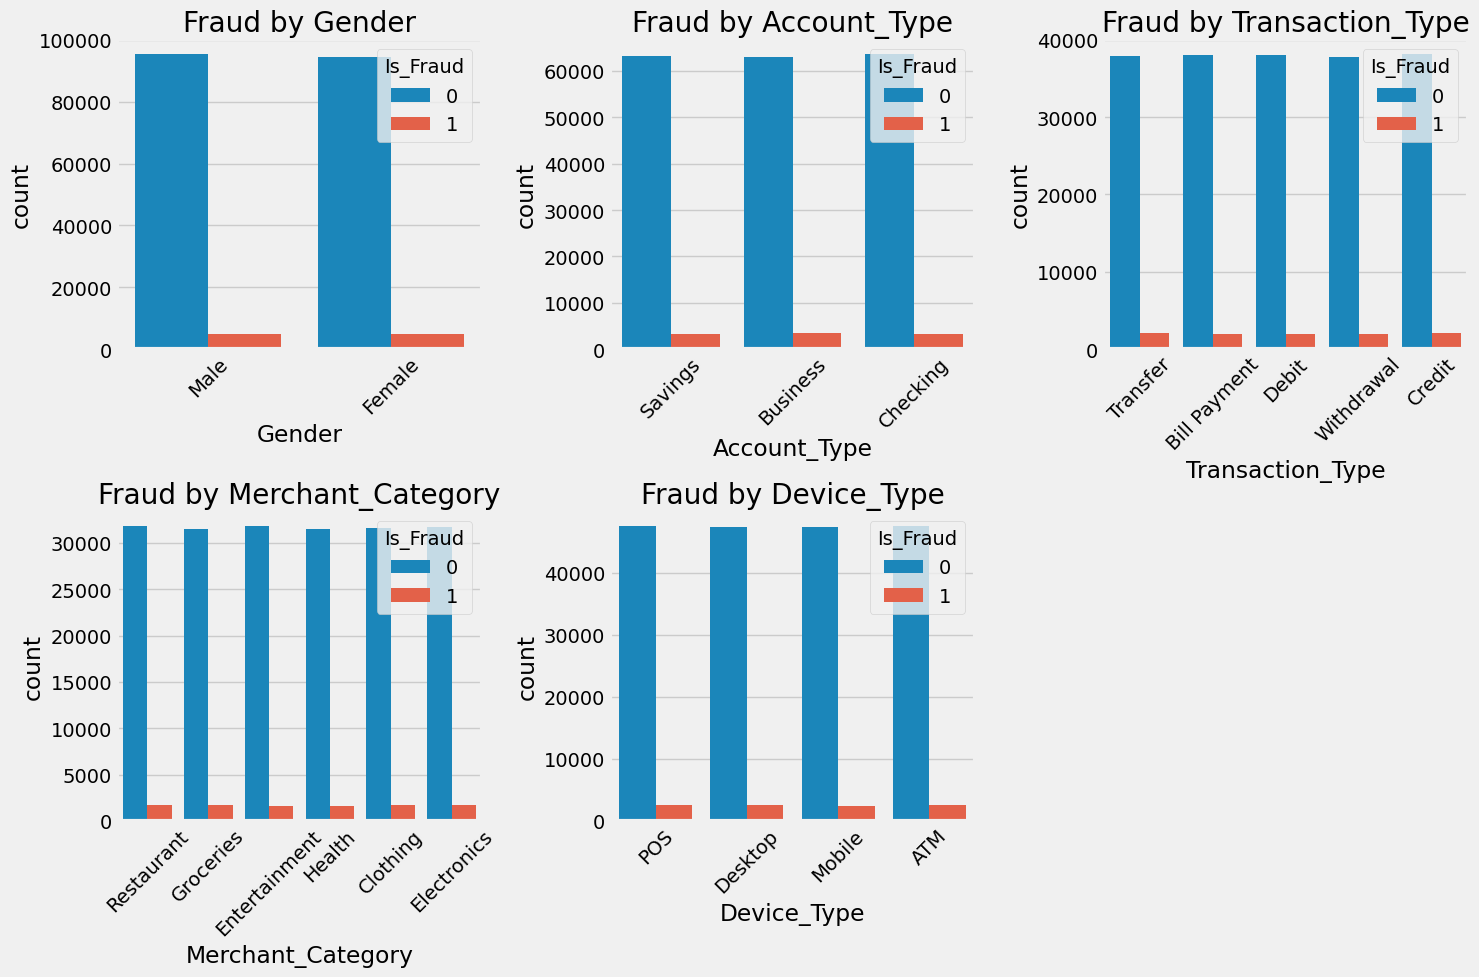

\Fraud Rate by Categories:

Gender Analysis:
Gender
Female    5.0
Male      5.1
Name: Is_Fraud, dtype: float64

Account_Type Analysis:
Account_Type
Business    5.2
Checking    4.9
Savings     5.0
Name: Is_Fraud, dtype: float64

Transaction_Type Analysis:
Transaction_Type
Bill Payment    4.9
Credit          5.1
Debit           5.1
Transfer        5.2
Withdrawal      4.9
Name: Is_Fraud, dtype: float64

Merchant_Category Analysis:
Merchant_Category
Clothing         5.2
Electronics      5.0
Entertainment    4.8
Groceries        5.2
Health           5.0
Restaurant       5.0
Name: Is_Fraud, dtype: float64

Device_Type Analysis:
Device_Type
ATM        5.0
Desktop    5.1
Mobile     5.0
POS        5.1
Name: Is_Fraud, dtype: float64


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter categorical columns with less than 20 unique values
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if df[col].nunique() < 20]

# Set the number of charts per row and rows
num_cols = 3  # Number of charts per row
num_rows = 2  # Number of rows

# Calculate the total number of subplots needed
total_plots = len(categorical_cols)

# Create a figure with the appropriate number of rows and columns
plt.figure(figsize=(15, 5 * num_rows))

# Plot the count plots for the filtered categorical columns
for i, col in enumerate(categorical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(data=df, x=col, hue='Is_Fraud')
    plt.title(f'Fraud by {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Calculate churn rate by categories
print("\Fraud Rate by Categories:")
for col in categorical_cols:
    print(f"\n{col} Analysis:")
    print(df.groupby(col)['Is_Fraud'].mean().round(3) * 100)

# 4. Convert Date Time Columns to Numerical Columns

In [19]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], format='%d-%m-%Y')
df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'], format='%H:%M:%S')

In [20]:
# Extract new features from 'Transaction_Date' and 'Transaction_Time'
df['Transaction_Day'] = df['Transaction_Date'].dt.day
df['Transaction_Month'] = df['Transaction_Date'].dt.month
df['Transaction_Year'] = df['Transaction_Date'].dt.year
df['Transaction_Hour'] = df['Transaction_Time'].dt.hour
df['Transaction_Minute'] = df['Transaction_Time'].dt.minute
df['Transaction_Second'] = df['Transaction_Time'].dt.second

In [21]:
# Drop 'Transaction_Date' and 'Transaction_Time' columns after feature extraction
df = df.drop(columns=['Transaction_Date', 'Transaction_Time'])

In [22]:
# If a column has only one unique value, it won't be useful for prediction.
single_value_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Columns with only one unique value:", single_value_columns)

# Dropping columns with one unique value
df = df.drop(columns=single_value_cols)

Columns with only one unique value: ['Transaction_Currency']


In [23]:
# For numerical columns, updating after conversion
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Columns ::", numerical_columns)
print("-"*50)
# For categorical columns, updating after conversion
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns ::", categorical_columns)

Numerical Columns :: Index(['Age', 'Transaction_Amount', 'Account_Balance', 'Is_Fraud'], dtype='object')
--------------------------------------------------
Categorical Columns :: Index(['Gender', 'State', 'City', 'Bank_Branch', 'Account_Type',
       'Transaction_Type', 'Merchant_Category', 'Transaction_Device',
       'Transaction_Location', 'Device_Type', 'Transaction_Description'],
      dtype='object')


In [24]:
df.head()

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Description,Transaction_Day,Transaction_Hour,Transaction_Minute,Transaction_Second
0,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,32415.45,Transfer,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,Bitcoin transaction,23,16,4,7
1,Female,51,Maharashtra,Nashik,Nashik Branch,Business,43622.60,Bill Payment,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,Grocery delivery,11,17,14,53
2,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,63062.56,Bill Payment,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,Mutual fund investment,25,3,9,52
3,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,14000.72,Debit,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,Food delivery,19,12,27,2
4,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,18335.16,Transfer,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,Debt repayment,30,18,30,46


# 5. Encode Categorical Features

In [25]:
# Initializing the LabelEncoder
label_encoder = LabelEncoder()

In [26]:
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [27]:
df.head()

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Description,Transaction_Day,Transaction_Hour,Transaction_Minute,Transaction_Second
0,1,60,15,127,127,2,32415.45,3,5,74557.27,17,129,3,0,9,23,16,4,7
1,0,51,18,100,100,0,43622.60,0,5,74622.66,9,102,1,0,65,11,17,14,53
2,1,20,4,13,13,2,63062.56,0,3,66817.99,0,13,1,0,102,25,3,9,52
3,0,57,28,22,22,0,14000.72,2,2,58177.08,8,24,2,0,51,19,12,27,2
4,0,43,25,7,7,2,18335.16,3,2,16108.56,16,7,2,0,37,30,18,30,46


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Gender                   200000 non-null  int64  
 1   Age                      200000 non-null  int64  
 2   State                    200000 non-null  int64  
 3   City                     200000 non-null  int64  
 4   Bank_Branch              200000 non-null  int64  
 5   Account_Type             200000 non-null  int64  
 6   Transaction_Amount       200000 non-null  float64
 7   Transaction_Type         200000 non-null  int64  
 8   Merchant_Category        200000 non-null  int64  
 9   Account_Balance          200000 non-null  float64
 10  Transaction_Device       200000 non-null  int64  
 11  Transaction_Location     200000 non-null  int64  
 12  Device_Type              200000 non-null  int64  
 13  Is_Fraud                 200000 non-null  int64  
 14  Tran

In [29]:
df.nunique()

,0
Gender,2
Age,53
State,34
City,145
Bank_Branch,145
Account_Type,3
Transaction_Amount,197978
Transaction_Type,5
Merchant_Category,6
Account_Balance,197954


# 6. EDA after Label Encoder

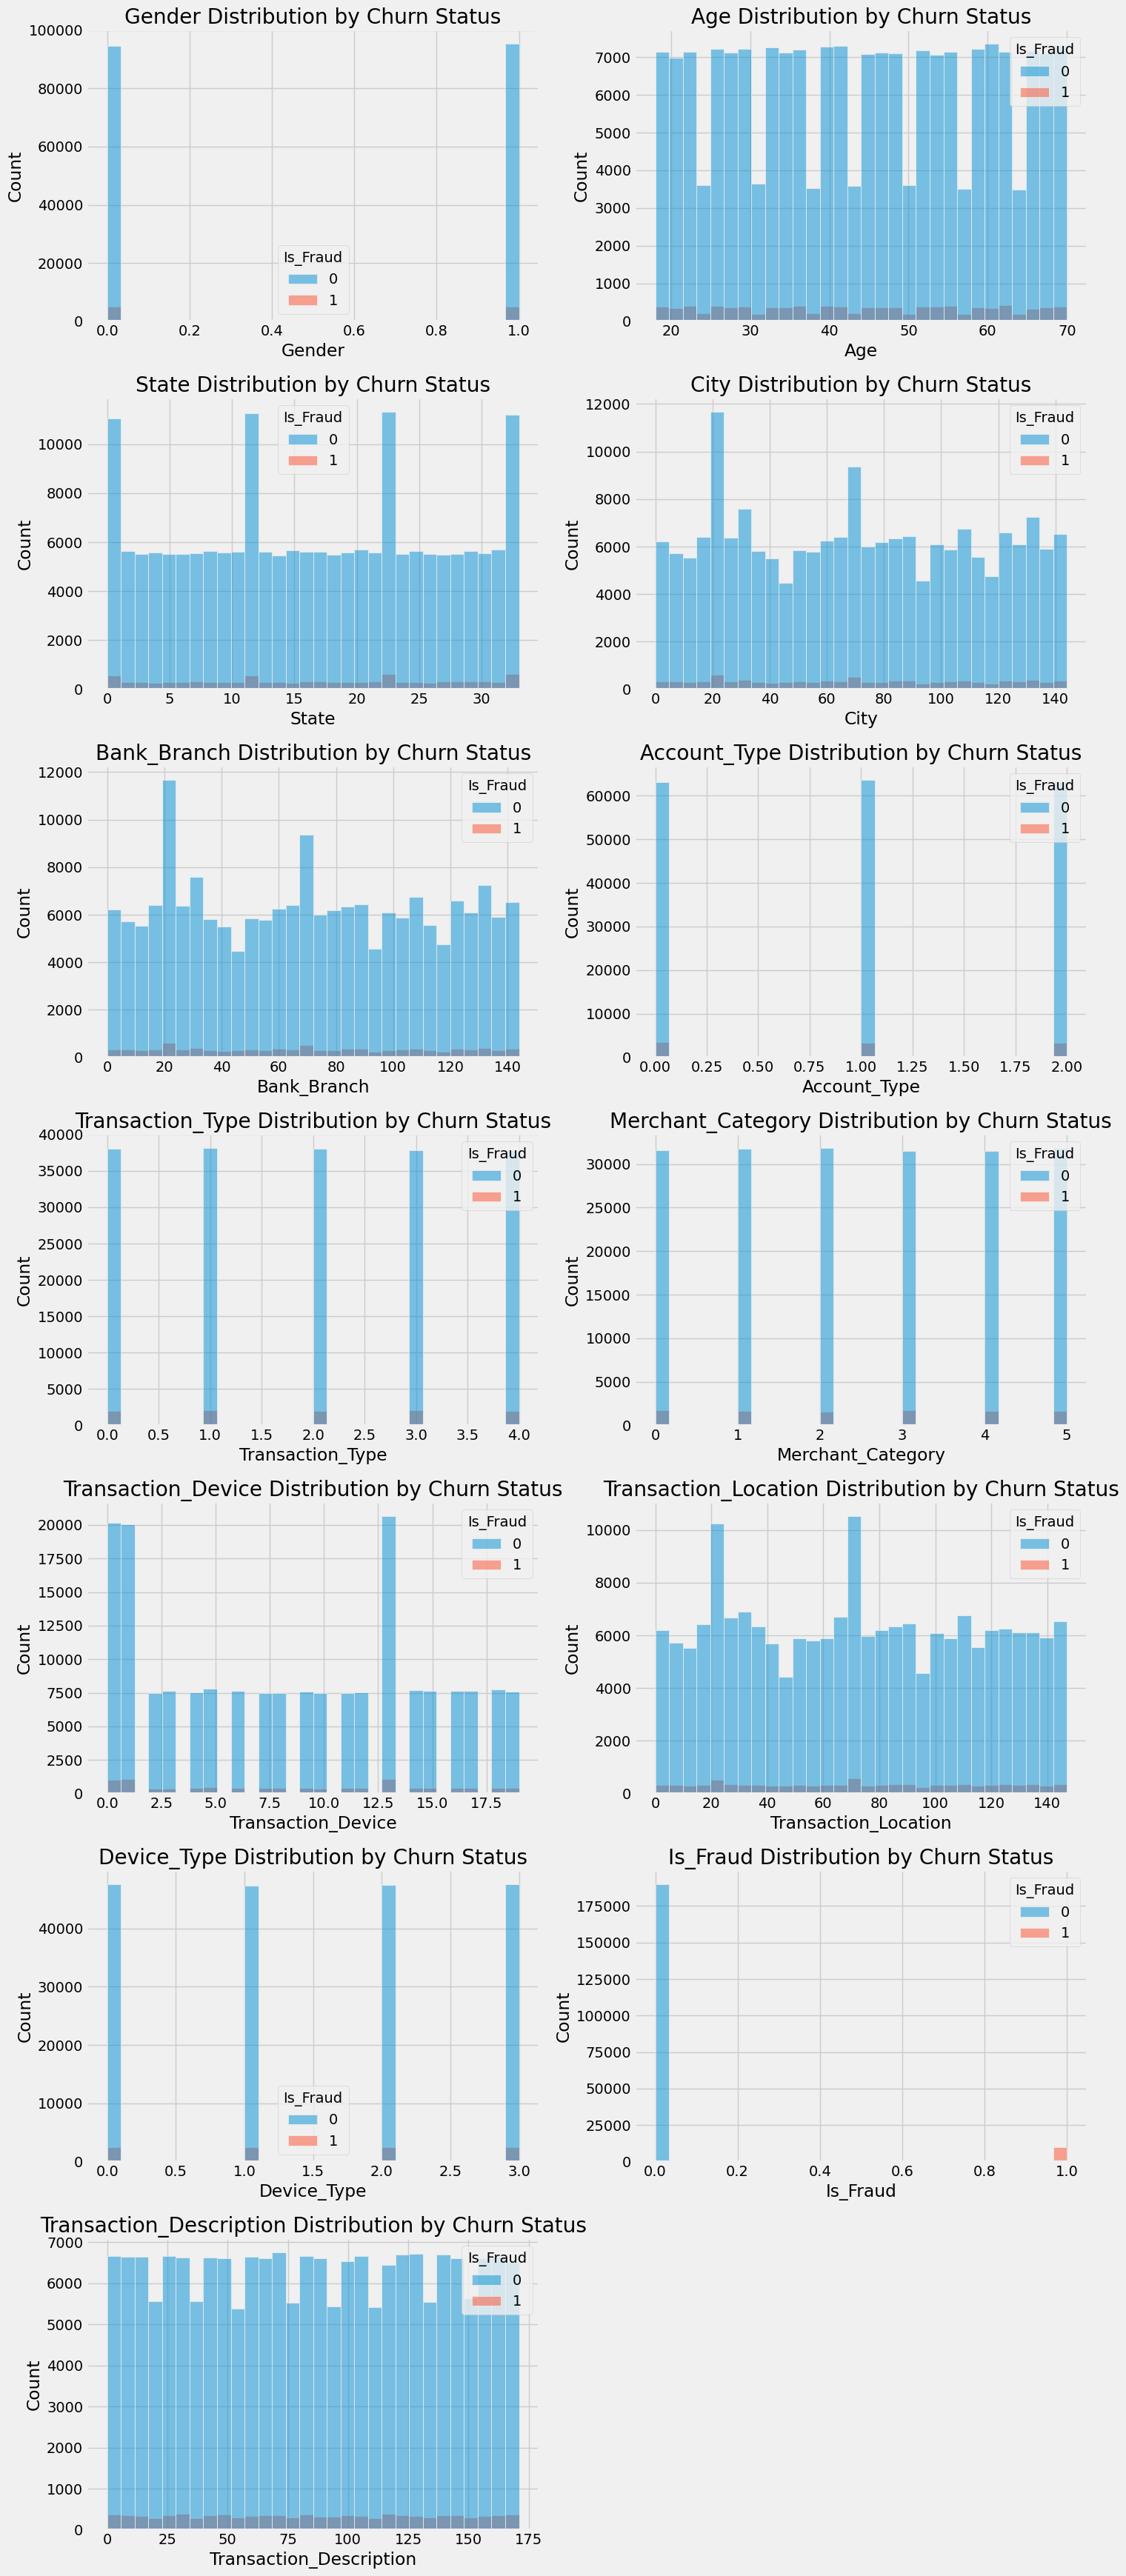

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter numerical columns with less than 20 unique values
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
numerical_features = [col for col in numerical_features if df[col].nunique() < 200]

# Set the number of charts per row
num_cols = 2  # Number of charts per row

# Calculate the number of rows needed based on the number of features
num_rows = (len(numerical_features) + num_cols - 1) // num_cols  # This ensures enough rows are created

# Create a figure with the appropriate number of rows and columns
plt.figure(figsize=(15, 5 * num_rows))

# Plot the histograms for the filtered numerical columns
for i, feature in enumerate(numerical_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data=df, x=feature, hue='Is_Fraud', bins=30)
    plt.title(f'{feature} Distribution by Churn Status')

plt.tight_layout()
plt.show()

# 7. Visualize Fraud Patterns and Distribution of Features

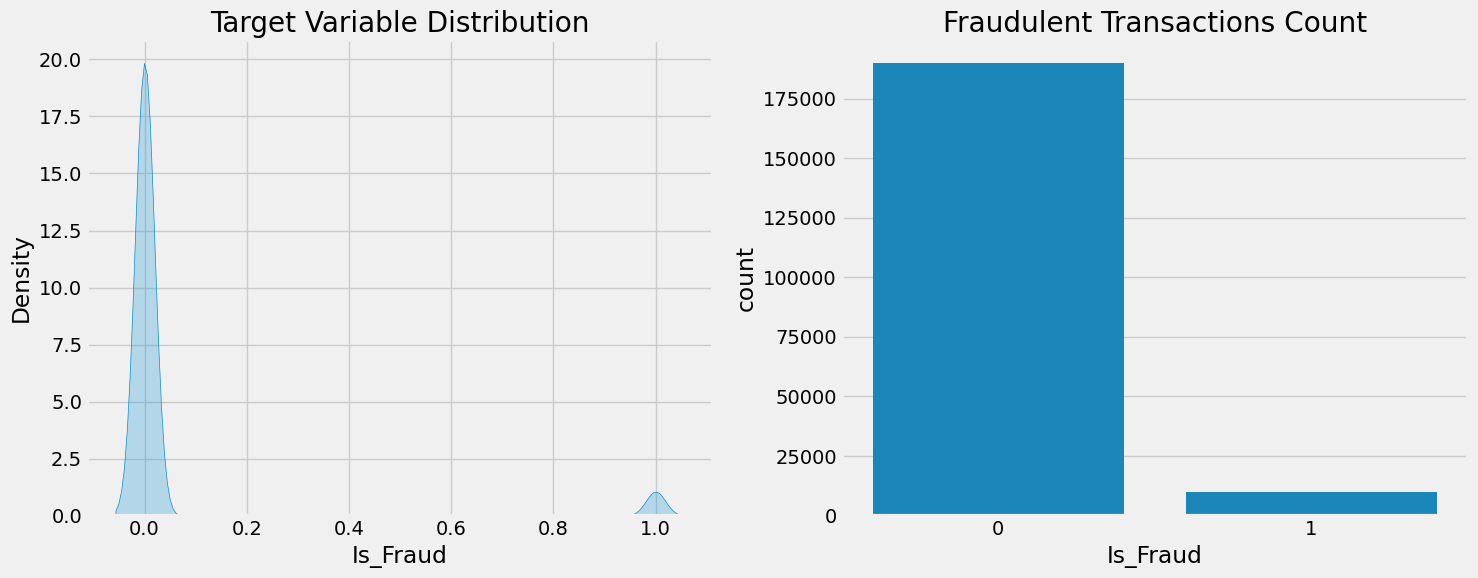

In [31]:
# Create a figure with 2 subplots in a horizontal row
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# KDE plot for the 'Is_Fraud' column (on the first subplot)
sns.kdeplot(df["Is_Fraud"], fill=True, ax=axes[0])
axes[0].set_title('Target Variable Distribution')

# Count plot for the 'Is_Fraud' column (on the second subplot)
sns.countplot(x='Is_Fraud', data=df, ax=axes[1])
axes[1].set_title('Fraudulent Transactions Count')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

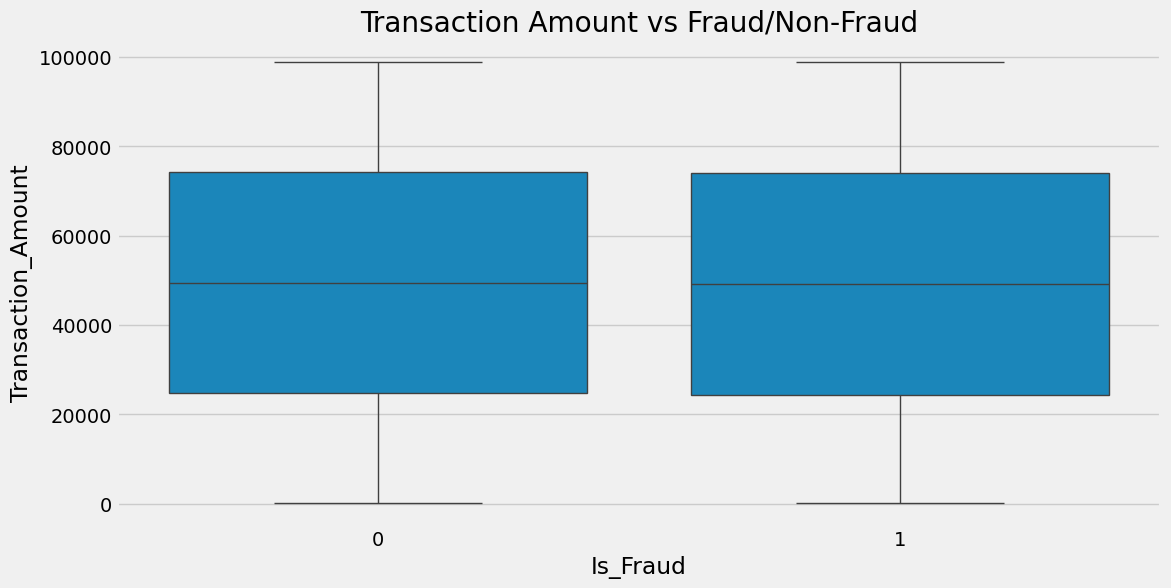

In [32]:
# Visualize fraud transactions based on 'Transaction_Amount'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Is_Fraud', y='Transaction_Amount', data=df)
plt.title("Transaction Amount vs Fraud/Non-Fraud")
plt.show()

# 8. Plot Correlation Matrix to Understand Feature Relationships

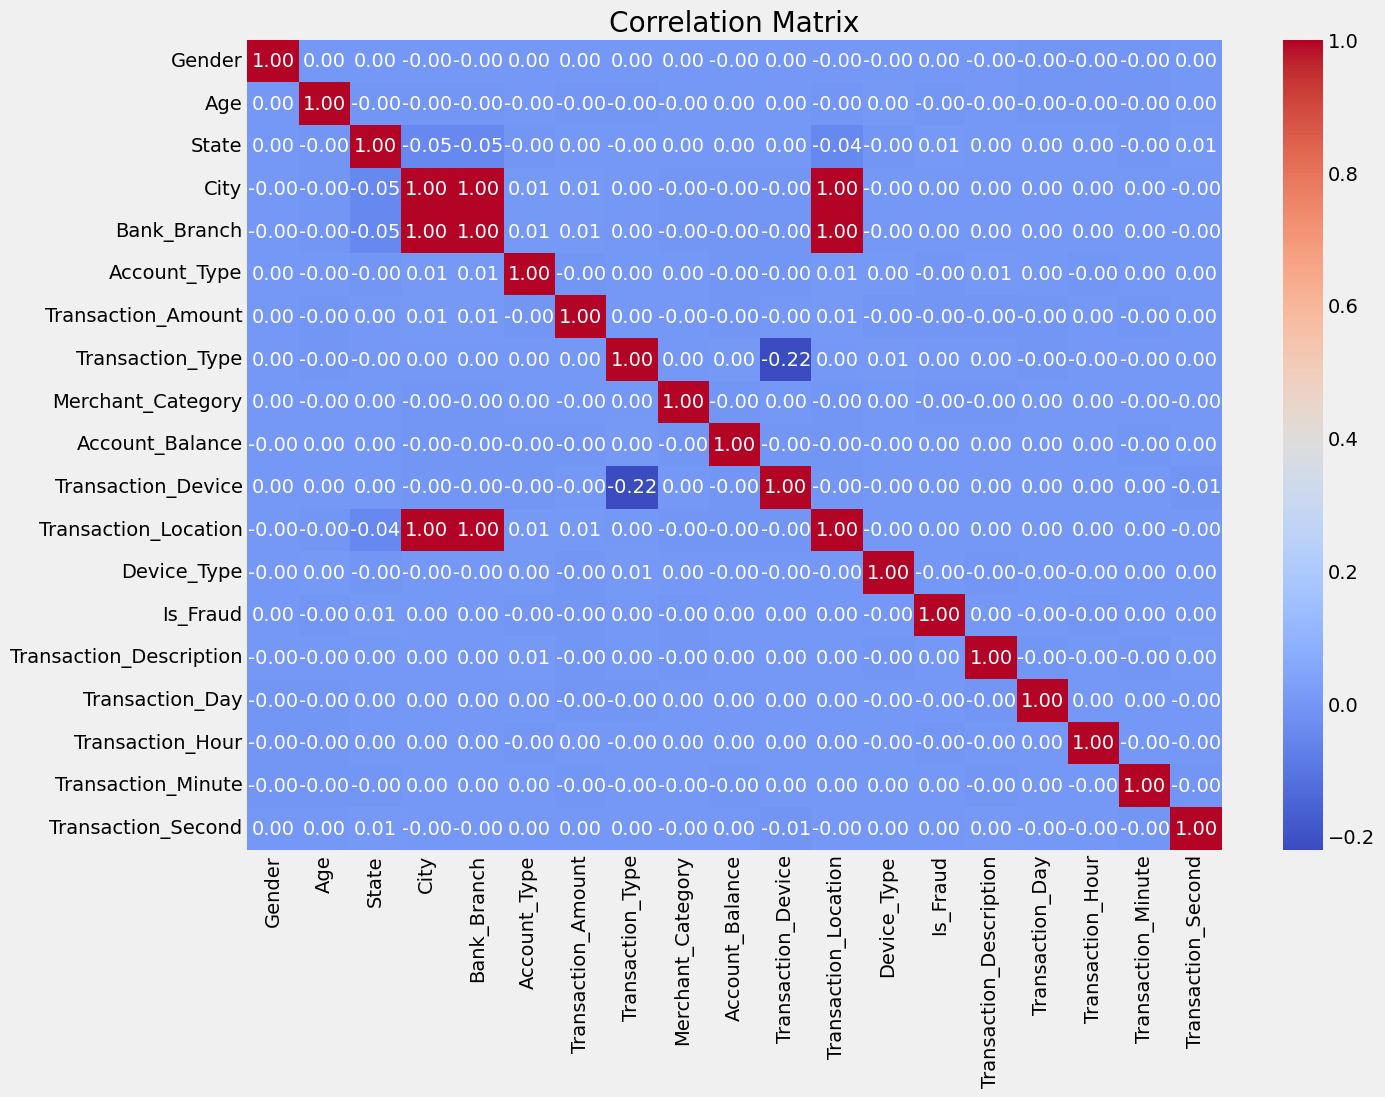

In [33]:
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

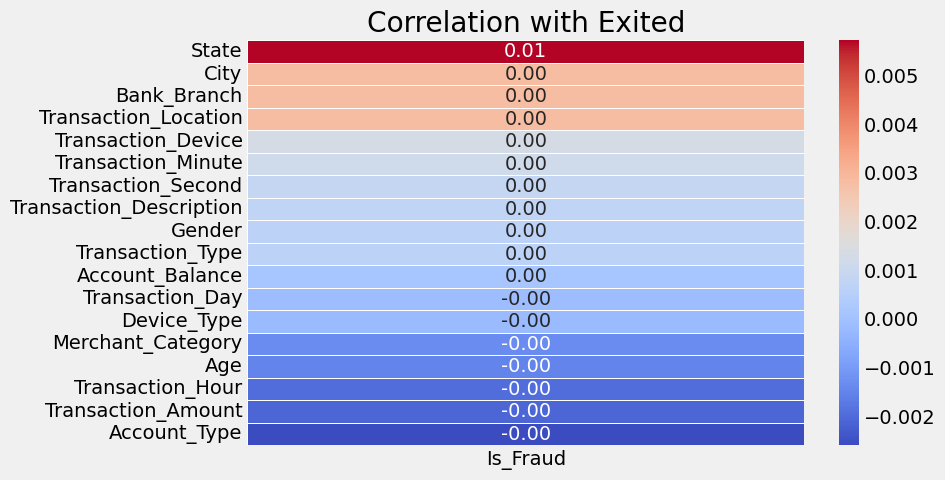

In [34]:
# Calculate correlation matrix for numerical columns
correlation_matrix = df.corr()

# Extract correlation with 'Exited' and drop 'Exited' itself
correlation_price = correlation_matrix['Is_Fraud'].sort_values(ascending=False).drop('Is_Fraud')

# Plot the heatmap for the correlation with 'Exited'
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_price.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation with Exited')
plt.show()

# 9. Feature Importance using Random Forest

In [35]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
X = df.drop(columns=['Is_Fraud'])
y = df['Is_Fraud']

In [36]:
print("Shape for X Dataframe: ", X.shape)
print("Columns for X Dataframe: ", X.columns)
print("-"*50)
print("Shape for y Dataframe: ", y.shape)

Shape for X Dataframe:  (200000, 18)
Columns for X Dataframe:  Index(['Gender', 'Age', 'State', 'City', 'Bank_Branch', 'Account_Type',
       'Transaction_Amount', 'Transaction_Type', 'Merchant_Category',
       'Account_Balance', 'Transaction_Device', 'Transaction_Location',
       'Device_Type', 'Transaction_Description', 'Transaction_Day',
       'Transaction_Hour', 'Transaction_Minute', 'Transaction_Second'],
      dtype='object')
--------------------------------------------------
Shape for y Dataframe:  (200000,)


In [37]:
# Train the model
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [38]:
# Get feature importances
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
feature_importances = feature_importances.sort_values('importance', ascending=False)

<Figure size 1200x800 with 0 Axes>

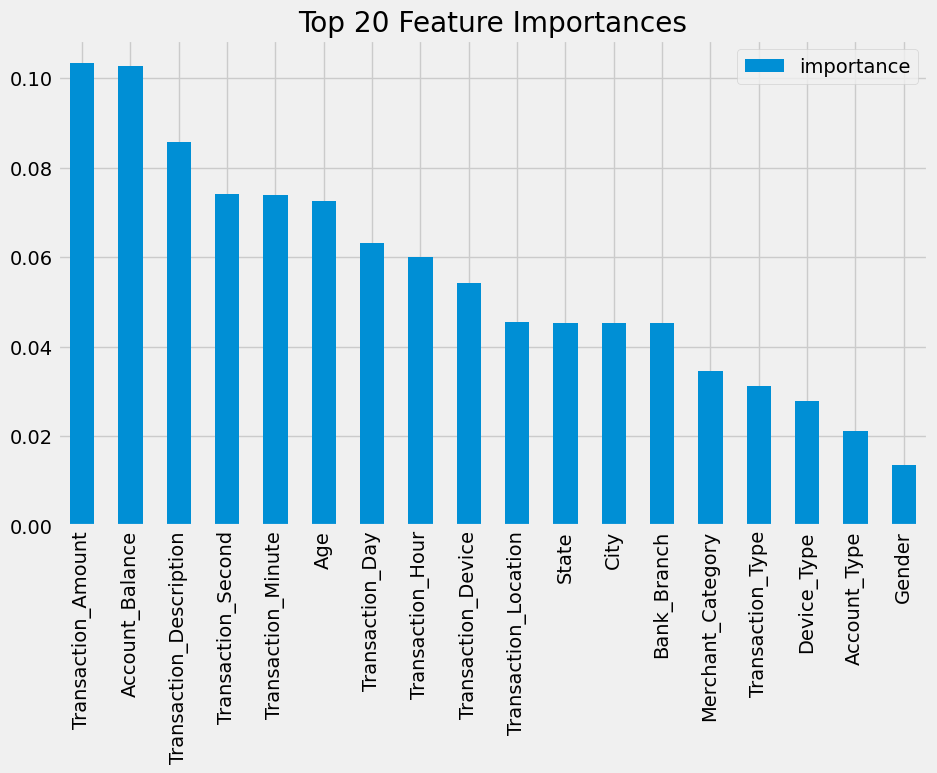

In [39]:
# Plot feature importances
plt.figure(figsize=(12, 8))
feature_importances.head(20).plot(kind='bar', figsize=(10, 6))
plt.title("Top 20 Feature Importances")
plt.show()

# 10. Select Only Important Features

In [40]:
# Select features with importance greater than a threshold (e.g., 0.01)
important_features = feature_importances[feature_importances['importance'] > 0.01].index
X = df[important_features]
print("Shape for X Dataframe: ", X.shape)
print("Columns for X Dataframe: ", X.columns)

Shape for X Dataframe:  (200000, 18)
Columns for X Dataframe:  Index(['Transaction_Amount', 'Account_Balance', 'Transaction_Description',
       'Transaction_Second', 'Transaction_Minute', 'Age', 'Transaction_Day',
       'Transaction_Hour', 'Transaction_Device', 'Transaction_Location',
       'State', 'City', 'Bank_Branch', 'Merchant_Category', 'Transaction_Type',
       'Device_Type', 'Account_Type', 'Gender'],
      dtype='object')


# 11. Perform PCA(Principal Component Analysis)

In [41]:
# If the number of features is large, PCA can help reduce dimensions
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
X_pca = pca.fit_transform(X)

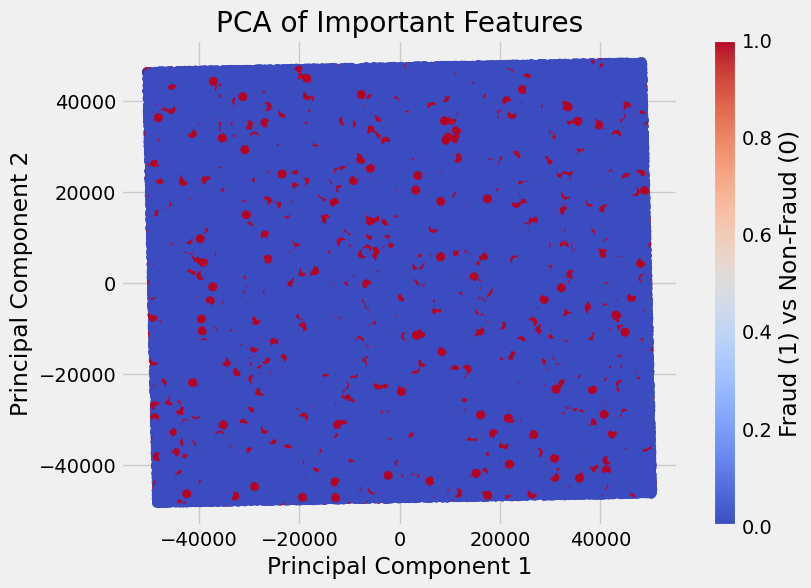

In [43]:
# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm')
plt.title("PCA of Important Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Fraud (1) vs Non-Fraud (0)')
plt.show()

# 12. Train-test Split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 13. Feature Scaling

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 14. Model Training and Evaluation

In [46]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'LightGBM': lgb.LGBMClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'KNN': KNeighborsClassifier()
    # 'SVM (RBF)': SVC(kernel='rbf', probability=True),
    # 'SVM (Linear)': LinearSVC(),
    # 'GaussianNB': GaussianNB()
    # 'LDA': LDA(),
    # 'QDA': QuadraticDiscriminantAnalysis(),
    # 'Ridge Classifier': RidgeClassifier(),
}

In [47]:
# Define reduced parameter grids
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1],
        'solver': ['liblinear'],
        'penalty': ['l2']
    },
    'Decision Tree': {
        'max_depth': [5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'Random Forest': {
        'n_estimators': [50, 100],
        'max_depth': [10],
        'min_samples_split': [2],
        'min_samples_leaf': [1]
    },
    'Gradient Boosting': {
        'n_estimators': [100],
        'learning_rate': [0.1],
        'max_depth': [5]
    },
    'XGBoost': {
        'n_estimators': [100],
        'learning_rate': [0.1],
        'max_depth': [5],
        'subsample': [0.8, 1.0]
    },
    'SVM (RBF)': {
        'C': [1, 10],
        'gamma': ['scale', 'auto']
    },
    'SVM (Linear)': {
        'C': [1, 10],
    },
    'LightGBM': {
        'n_estimators': [100],
        'learning_rate': [0.1],
        'max_depth': [3, 5],
    },
    'KNN': {
        'n_neighbors': [3],
        'weights': ['uniform', 'distance']
    },
    'AdaBoost': {
        'n_estimators': [100],
        'learning_rate': [0.01, 0.1]
    },
    'Bagging': {
        'n_estimators': [100],
        'max_samples': [0.8, 1.0]
    },
    'LDA': {},
    'QDA': {},
    'Ridge Classifier': {
        'alpha': [0.1, 1]
    },
    'GaussianNB': {}
}

In [48]:
# Initialize an empty dictionary to store results
model_results = {}

# Handle class imbalance by computing class weights for each model that supports it
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print("class_weight_dict: ", class_weight_dict)

# Handle SMOTE for class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Evaluate models with GridSearchCV
for model_name, model in models.items():
    print(f"Training model with GridSearchCV: {model_name}")

    # Get the parameter grid for the model
    param_grid = param_grids[model_name]

    # Modify model to include class weights where applicable
    if model_name in ['Logistic Regression', 'Random Forest', 'SVM (RBF)', 'SVM (Linear)']:
        # Assign class weights for models that support it
        if model_name == 'Logistic Regression':
            model = LogisticRegression(class_weight='balanced')
        elif model_name == 'Random Forest':
            model = RandomForestClassifier(class_weight='balanced')
        elif model_name in ['SVM (RBF)', 'SVM (Linear)']:
            model = SVC(probability=True, class_weight='balanced') if model_name == 'SVM (RBF)' else LinearSVC(class_weight='balanced')

    # Perform GridSearchCV with parallelism
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

    # Fit the model with the best parameters using the resampled data
    grid_search.fit(X_train_smote, y_train_smote)

    # Get the best model and its parameters
    best_model = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

    # Predict on both train and test sets
    y_train_pred = best_model.predict(X_train_smote)
    y_test_pred = best_model.predict(X_test_scaled)

    # Store the results
    model_results[model_name] = {
        'train_accuracy': best_model.score(X_train_smote, y_train_smote),
        'test_accuracy': best_model.score(X_test_scaled, y_test),
        'y_test': y_test,
        'y_test_pred': y_test_pred,
        'classification_report': classification_report(y_test, y_test_pred),
        'roc_auc': roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
    }

    # Print results after all models are evaluated
    print("\nModel Evaluation Results:")
    print(f"Model: {model_results[model_name]}\n")
    print(f"Train Accuracy: {model_results[model_name]['train_accuracy']:.4f}")
    print(f"Test Accuracy: {model_results[model_name]['test_accuracy']:.4f}")
    print(f"ROC AUC: {model_results[model_name]['roc_auc']:.4f}\n")
    print(f"Classification Report:\n{model_results[model_name]['classification_report']}")
    print("-" * 80)

class_weight_dict:  {0: 0.5264647235731161, 1: 9.946537361680965}
Training model with GridSearchCV: Logistic Regression
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

Model Evaluation Results:
Model: {'train_accuracy': 0.5110919536447811, 'test_accuracy': 0.509575, 'y_test': 119737    0
72272     0
158154    0
65426     0
30074     0
         ..
4174      0
91537     0
156449    0
184376    0
6584      0
Name: Is_Fraud, Length: 40000, dtype: int64, 'y_test_pred': array([0, 1, 1, ..., 1, 1, 0]), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.95      0.51      0.66     37955\n           1       0.05      0.50      0.09      2045\n\n    accuracy                           0.51     40000\n   macro avg       0.50      0.50      0.38     40000\nweighted avg       0.90      0.51      0.63     40000\n', 'roc_auc': 0.49595028728847923}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Model Evaluation Results:
Model: {'train_accuracy': 0.9471528129668262, 'test_accuracy': 0.948875, 'y_test': 119737    0
72272     0
158154    0
65426     0
30074     0
         ..
4174      0
91537     0
156449    0
184376    0
6584      0
Name: Is_Fraud, Length: 40000, dtype: int64, 'y_test_pred': array([0, 0, 0, ..., 0, 0, 0]), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.95      1.00      0.97     37955\n           1       0.00      0.00      0.00      2045\n\n    accuracy                           0.95     40000\n   macro avg       0.47      0.50      0.49     40000\nweighted avg       0.90      0.95      0.92     40000\n', 'roc_auc': 0.49996872502793327}

Train Accuracy: 0.9472
Test Accuracy: 0.9489
ROC AUC: 0.5000

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37955
           1       0.00      0.00      0.00      2045

    accuracy         

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 151957, number of negative: 151957
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017320 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4584
[LightGBM] [Info] Number of data points in the train set: 303914, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to


Model Evaluation Results:
Model: {'train_accuracy': 0.9520357732779668, 'test_accuracy': 0.948875, 'y_test': 119737    0
72272     0
158154    0
65426     0
30074     0
         ..
4174      0
91537     0
156449    0
184376    0
6584      0
Name: Is_Fraud, Length: 40000, dtype: int64, 'y_test_pred': array([0, 0, 0, ..., 0, 0, 0]), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.95      1.00      0.97     37955\n           1       0.00      0.00      0.00      2045\n\n    accuracy                           0.95     40000\n   macro avg       0.47      0.50      0.49     40000\nweighted avg       0.90      0.95      0.92     40000\n', 'roc_auc': 0.4997815261220097}

Train Accuracy: 0.9520
Test Accuracy: 0.9489
ROC AUC: 0.4998

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37955
           1       0.00      0.00      0.00      2045

    accuracy          

# 15. Plotting the Train Vs Test Accuracy Chart

----------------------------------------
Model: Logistic Regression
----------------------------------------
Train Accuracy: 0.5111
Test Accuracy: 0.5096
ROC AUC: 0.4960
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.51      0.66     37955
           1       0.05      0.50      0.09      2045

    accuracy                           0.51     40000
   macro avg       0.50      0.50      0.38     40000
weighted avg       0.90      0.51      0.63     40000

--------------------------------------------------------------------------------


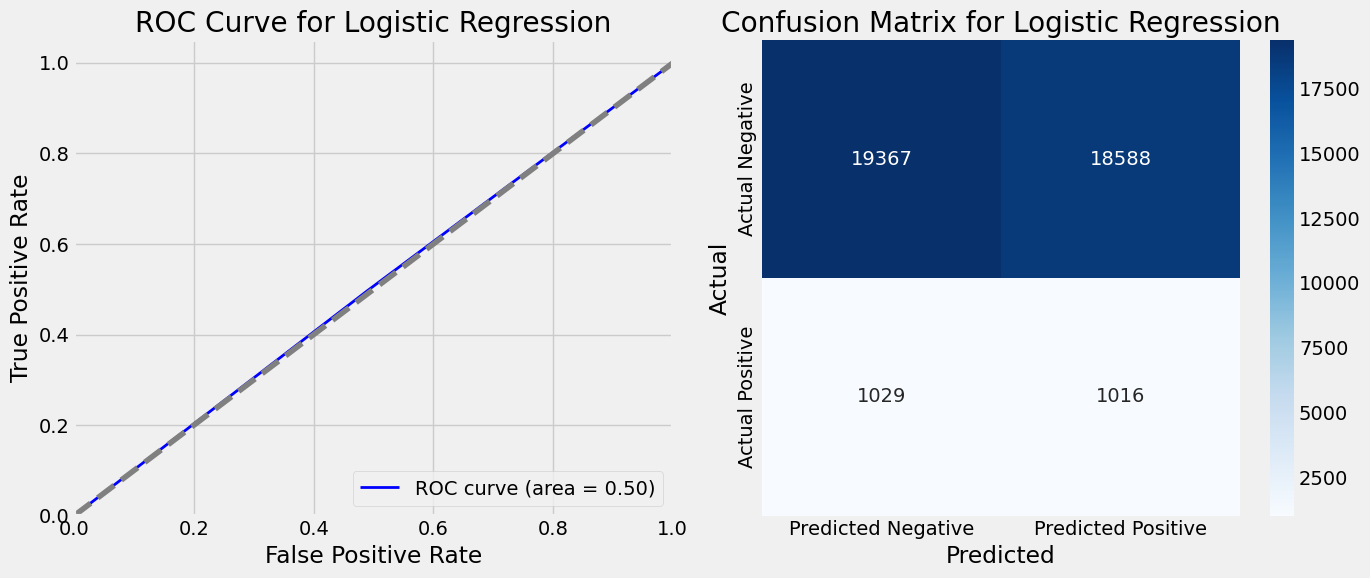

----------------------------------------
Model: Decision Tree
----------------------------------------
Train Accuracy: 0.8582
Test Accuracy: 0.9469
ROC AUC: 0.4978
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37955
           1       0.04      0.00      0.00      2045

    accuracy                           0.95     40000
   macro avg       0.49      0.50      0.49     40000
weighted avg       0.90      0.95      0.92     40000

--------------------------------------------------------------------------------


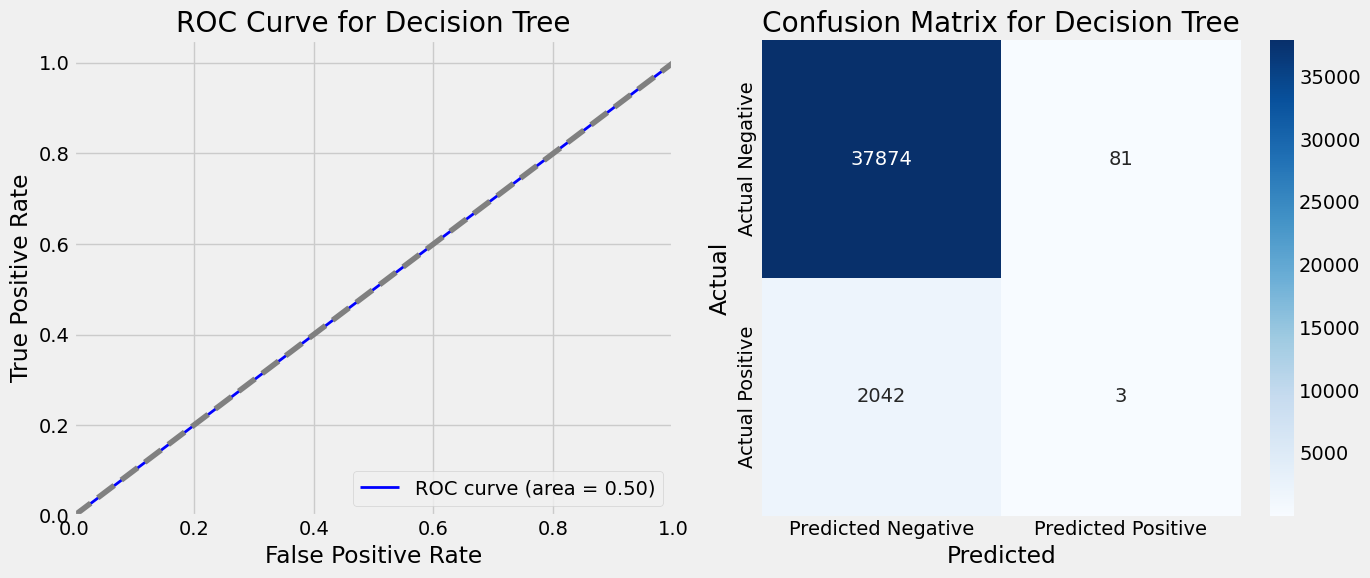

----------------------------------------
Model: Random Forest
----------------------------------------
Train Accuracy: 0.8401
Test Accuracy: 0.8404
ROC AUC: 0.5055
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     37955
           1       0.05      0.12      0.07      2045

    accuracy                           0.84     40000
   macro avg       0.50      0.50      0.49     40000
weighted avg       0.90      0.84      0.87     40000

--------------------------------------------------------------------------------


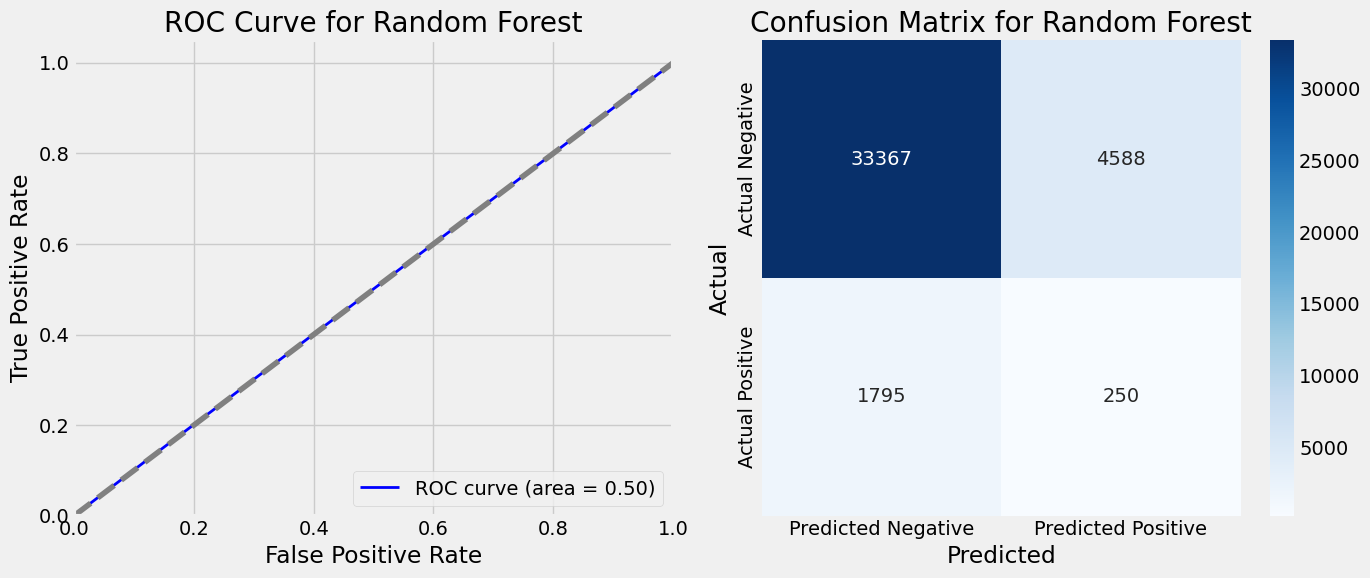

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


----------------------------------------
Model: Gradient Boosting
----------------------------------------
Train Accuracy: 0.9527
Test Accuracy: 0.9489
ROC AUC: 0.5045
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37955
           1       0.00      0.00      0.00      2045

    accuracy                           0.95     40000
   macro avg       0.47      0.50      0.49     40000
weighted avg       0.90      0.95      0.92     40000

--------------------------------------------------------------------------------


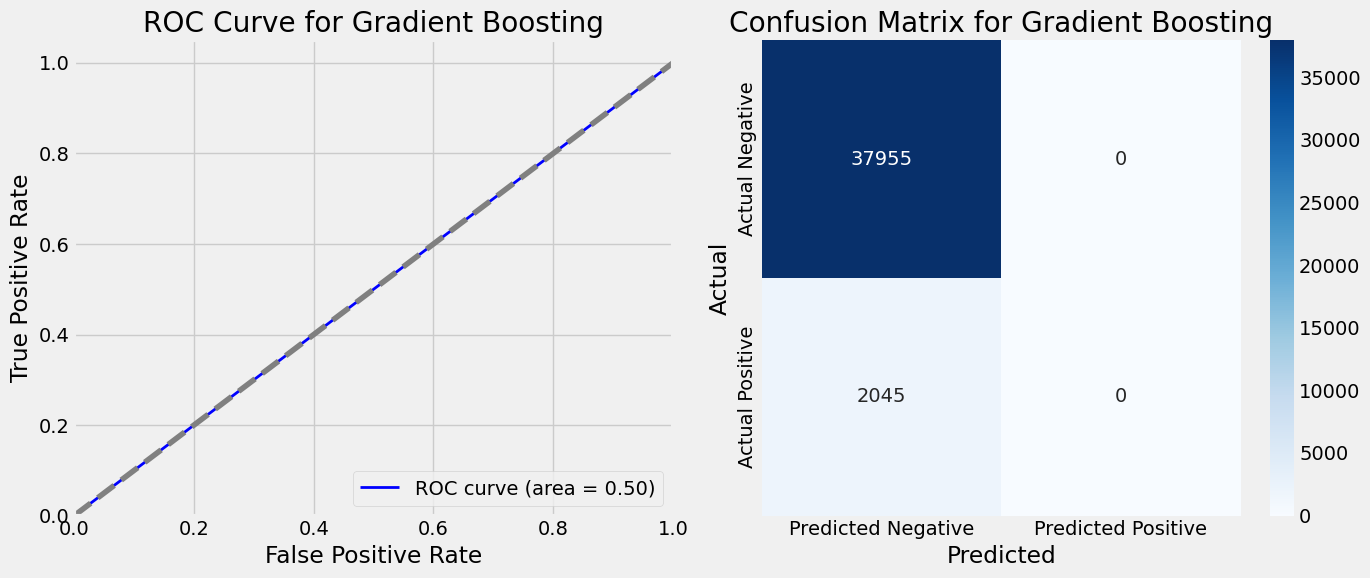

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


----------------------------------------
Model: XGBoost
----------------------------------------
Train Accuracy: 0.9472
Test Accuracy: 0.9489
ROC AUC: 0.5000
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37955
           1       0.00      0.00      0.00      2045

    accuracy                           0.95     40000
   macro avg       0.47      0.50      0.49     40000
weighted avg       0.90      0.95      0.92     40000

--------------------------------------------------------------------------------


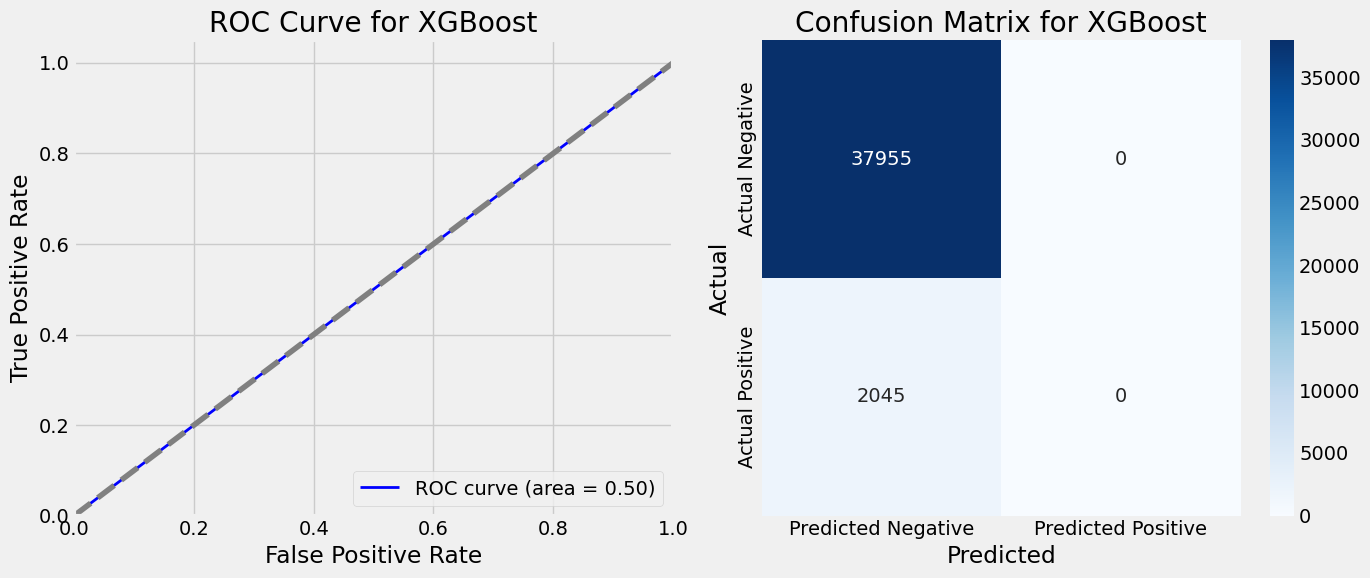

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


----------------------------------------
Model: LightGBM
----------------------------------------
Train Accuracy: 0.9520
Test Accuracy: 0.9489
ROC AUC: 0.4998
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37955
           1       0.00      0.00      0.00      2045

    accuracy                           0.95     40000
   macro avg       0.47      0.50      0.49     40000
weighted avg       0.90      0.95      0.92     40000

--------------------------------------------------------------------------------


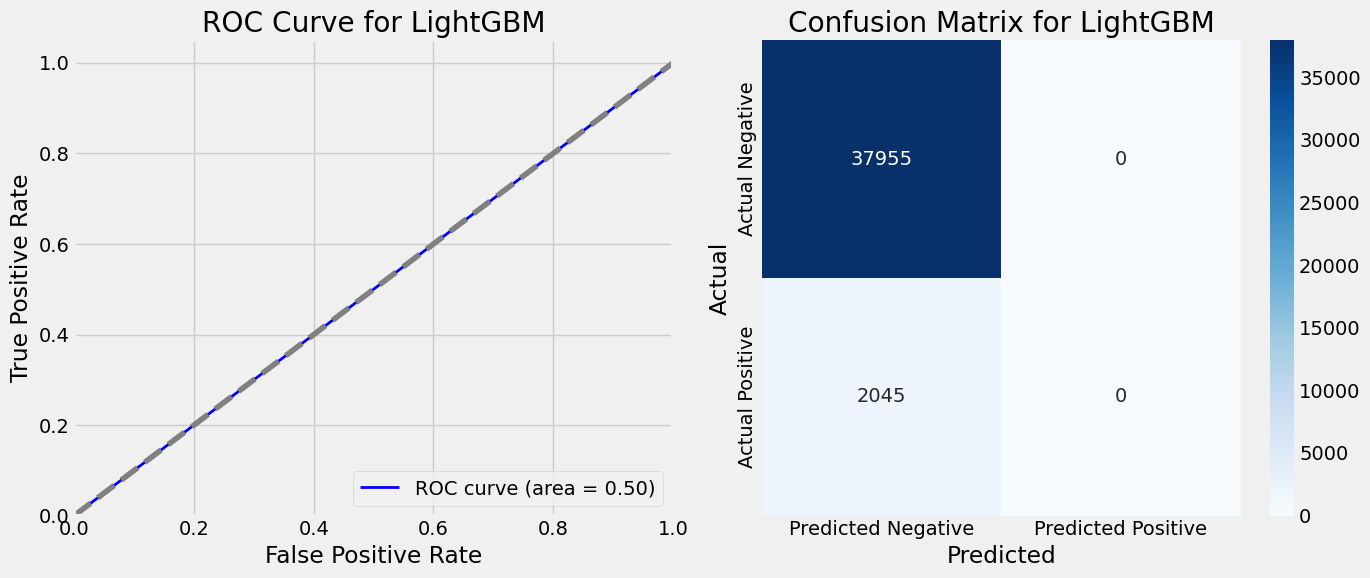

----------------------------------------
Model: AdaBoost
----------------------------------------
Train Accuracy: 0.6293
Test Accuracy: 0.4865
ROC AUC: 0.5061
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.48      0.64     37955
           1       0.05      0.52      0.09      2045

    accuracy                           0.49     40000
   macro avg       0.50      0.50      0.37     40000
weighted avg       0.90      0.49      0.61     40000

--------------------------------------------------------------------------------


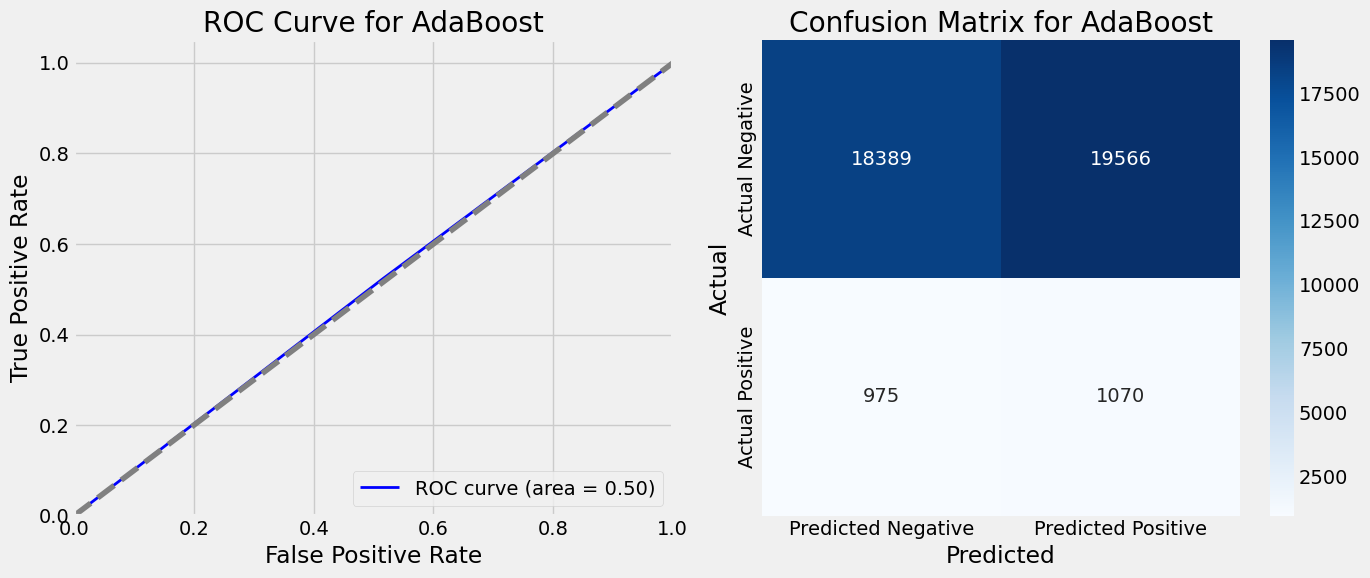

----------------------------------------
Model: Bagging
----------------------------------------
Train Accuracy: 1.0000
Test Accuracy: 0.9487
ROC AUC: 0.5077
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37955
           1       0.00      0.00      0.00      2045

    accuracy                           0.95     40000
   macro avg       0.47      0.50      0.49     40000
weighted avg       0.90      0.95      0.92     40000

--------------------------------------------------------------------------------


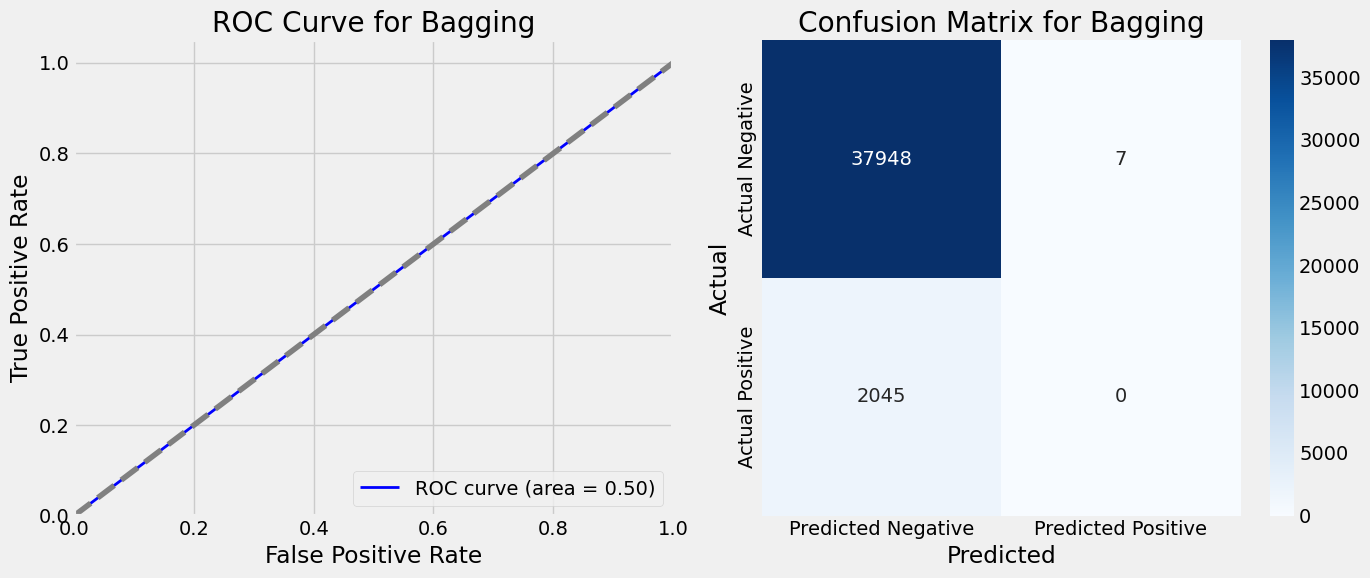

----------------------------------------
Model: KNN
----------------------------------------
Train Accuracy: 1.0000
Test Accuracy: 0.7367
ROC AUC: 0.4954
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.76      0.85     37955
           1       0.05      0.23      0.08      2045

    accuracy                           0.74     40000
   macro avg       0.50      0.50      0.46     40000
weighted avg       0.90      0.74      0.81     40000

--------------------------------------------------------------------------------


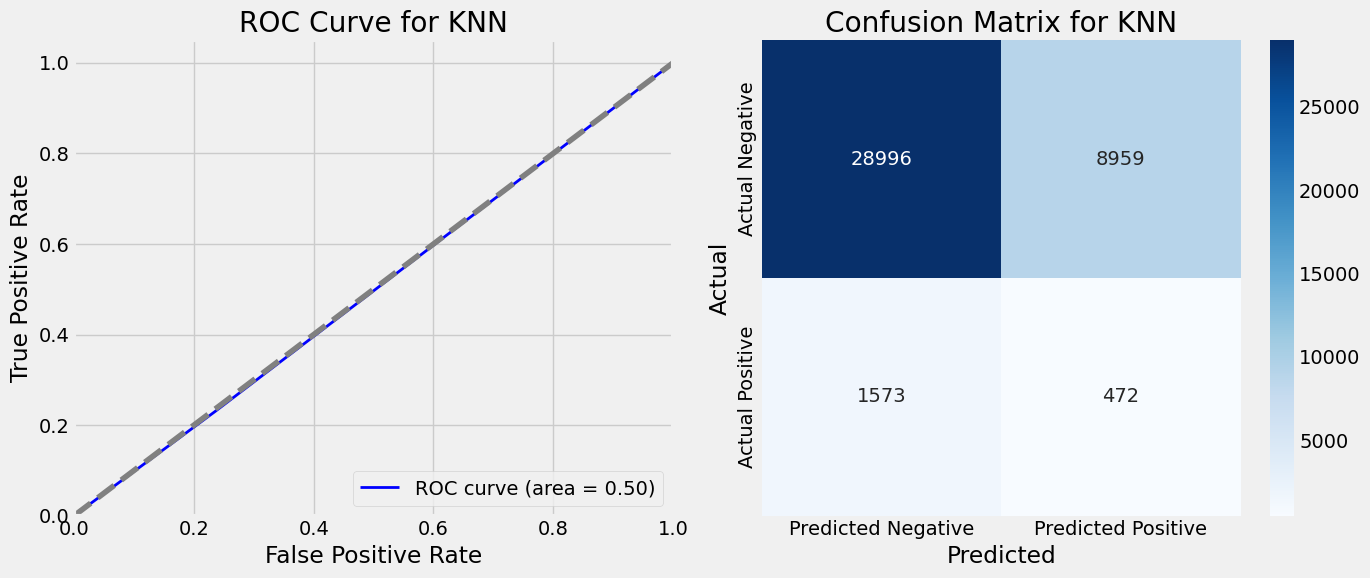

--------------------------------------------------------------------------------


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Initialize a list to store results for all models
results_list = []

# Iterate through the models to collect results and plot confusion matrix and ROC curve
for model_name, model in model_results.items():
    # Extract the predicted values and actual values
    y_test_pred = model['y_test_pred']  # Use the predicted labels
    y_test = model['y_test']  # Actual true labels

    # Extract metrics
    train_accuracy = model['train_accuracy']
    test_accuracy = model['test_accuracy']
    roc_auc = model['roc_auc']

    # Classification Report
    clf_report = classification_report(y_test, y_test_pred)

    # Print the model name followed by its evaluation metrics
    print("-" * 40)
    print(f"Model: {model_name}")
    print("-" * 40)
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("Classification Report:")
    print(clf_report)
    print("-" * 80)  # Separator line for clarity

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_test_pred)
    roc_auc_value = auc(fpr, tpr)

    # Create subplots: 1 row, 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # Width, Height

    # Plot ROC Curve on the first subplot
    ax1.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (area = {roc_auc_value:.2f})')
    ax1.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title(f'ROC Curve for {model_name}')
    ax1.legend(loc='lower right')

    # Plot Confusion Matrix on the second subplot
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'], ax=ax2)
    ax2.set_title(f'Confusion Matrix for {model_name}')
    ax2.set_xlabel('Predicted')
    ax2.set_ylabel('Actual')

    # Show both plots
    plt.tight_layout()
    plt.show()

    # Append the results to the list for the DataFrame
    results_list.append({
        'Model': model_name,
        'Train Accuracy': f"{train_accuracy:.4f}",
        'Test Accuracy': f"{test_accuracy:.4f}",
        'ROC AUC': f"{roc_auc:.4f}",
        'Classification Report': clf_report
    })

# Convert results into a DataFrame for better presentation
results_df = pd.DataFrame(results_list)

# Print the summary of results in a tabular format
# print("\nSummary of Model Evaluation Results:")
# print(results_df.to_string(index=False))  # Display as a pretty table
print("-" * 80)